In [5]:
!pip install pyarabic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 10.2 MB/s eta 0:00:00


In [6]:
import re
import seaborn as sns
from rich import print
from datasets import load_dataset
from pyarabic.araby import strip_tashkeel
from pyarabic.araby import sentence_tokenize

In [7]:
sns.set_theme(context='notebook', style='dark')

In [8]:
data_ckpt, sub_data = 'wikimedia/wikipedia', '20231101.ar'

In [9]:
# we are using the first 10_000 articles only from the dataset
ds = load_dataset(data_ckpt, sub_data, split='train[:10000]')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/131k [00:00<?, ?B/s]

train-00000-of-00007.parquet:   0%|          | 0.00/408M [00:00<?, ?B/s]

train-00001-of-00007.parquet:   0%|          | 0.00/172M [00:00<?, ?B/s]

train-00002-of-00007.parquet:   0%|          | 0.00/145M [00:00<?, ?B/s]

train-00003-of-00007.parquet:   0%|          | 0.00/131M [00:00<?, ?B/s]

train-00004-of-00007.parquet:   0%|          | 0.00/65.1M [00:00<?, ?B/s]

train-00005-of-00007.parquet:   0%|          | 0.00/156M [00:00<?, ?B/s]

train-00006-of-00007.parquet:   0%|          | 0.00/246M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1219201 [00:00<?, ? examples/s]

In [10]:
ds

Dataset({
    features: ['id', 'url', 'title', 'text'],
    num_rows: 10000
})

In [26]:
text = ds[0]['text']
text = re.sub(r'\n+', '\n', text)

In [27]:
text

'الماء مادةٌ شفافةٌ عديمة اللون والرائحة، وهو المكوّن الأساسي للجداول والبحيرات والبحار والمحيطات وكذلك للسوائل في جميع الكائنات الحيّة، وهو أكثر المركّبات الكيميائيّة انتشاراً على سطح الأرض. يتألّف جزيء الماء من ذرّة أكسجين مركزية ترتبط بها ذرّتا هيدروجين على طرفيها برابطة تساهميّة بحيث تكون صيغته الكيميائية H2O. عند الظروف القياسية من الضغط ودرجة الحرارة يكون الماء سائلاً؛ أمّا الحالة الصلبة فتتشكّل عند نقطة التجمّد، وتدعى بالجليد؛ أمّا الحالة الغازية فتتشكّل عند نقطة الغليان، وتسمّى بخار الماء.\nإنّ الماء هو أساس وجود الحياة على كوكب الأرض، وهو يغطّي 71% من سطحها، وتمثّل مياه البحار والمحيطات أكبر نسبة للماء على الأرض، حيث تبلغ حوالي 96.5%. وتتوزّع النسب الباقية بين المياه الجوفيّة وبين جليد المناطق القطبيّة (1.7% لكليهما)، مع وجود نسبة صغيرة على شكل بخار ماء معلّق في الهواء على هيئة سحاب (غيوم)، وأحياناً أخرى على هيئة ضباب أو ندى، بالإضافة إلى الزخات المطريّة أو الثلجيّة. تبلغ نسبة الماء العذب حوالي 2.5% فقط من الماء الموجود على الأرض، وأغلب هذه الكمّيّة (حوالي 99%) موجودة في الكتل

In [13]:
len(text)

48710

In [15]:
len(text.split('\n'))

173

In [16]:
sents = sentence_tokenize(text)
len(sents)

33

In [17]:
sent_lens1 = [len(s) for s in text.split('\n')]
sent_lens2 = [len(s) for s in sents]

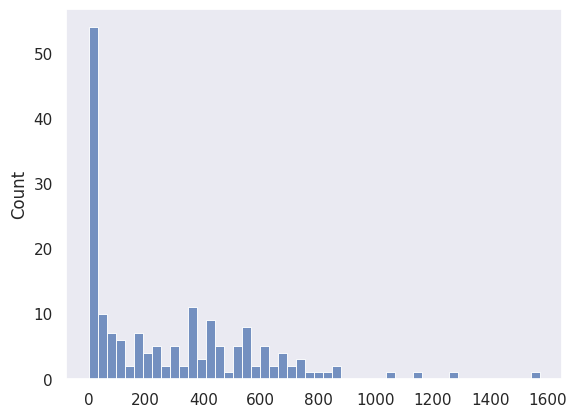

In [19]:
_ = sns.histplot(sent_lens1, bins=50)

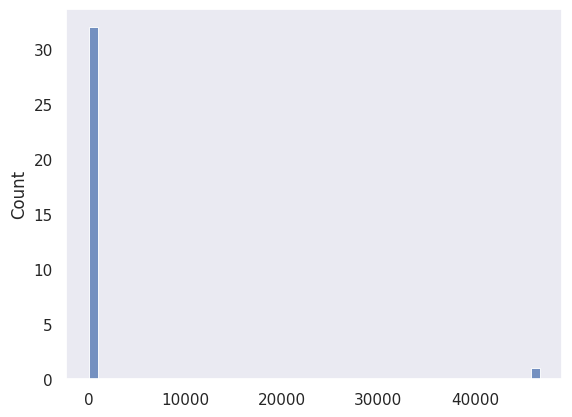

In [20]:
_ = sns.histplot(sent_lens2, bins=50)

In [21]:
print(sents[0])

الماء مادةٌ شفافةٌ عديمة اللون والرائحة،

In [22]:
ds = ds.map(lambda x: {'clean_text': re.sub(r'\n+', '\n', x['text'])}, num_proc=16)
ds

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'url', 'title', 'text', 'clean_text'],
    num_rows: 10000
})

In [30]:
ds = ds.map(lambda x: {'sentences': sentence_tokenize(x['clean_text'])}, num_proc=16)
ds

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'url', 'title', 'text', 'clean_text', 'sentences'],
    num_rows: 10000
})

In [32]:
print(ds[0]['sentences'][0])

الماء مادةٌ شفافةٌ عديمة اللون والرائحة،

In [31]:
ds = ds.map(lambda x: {'clean_sentences': [strip_tashkeel(s) for s in x['sentences']]}, num_proc=16)
ds

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'url', 'title', 'text', 'clean_text', 'sentences', 'clean_sentences'],
    num_rows: 10000
})

In [33]:
print(ds[0]['clean_sentences'][0])

الماء مادة شفافة عديمة اللون والرائحة،

In [34]:
all_sents = [s for article in ds for s in article['clean_sentences']]

In [35]:
len(all_sents)

243709

In [36]:
print(all_sents[0])

الماء مادة شفافة عديمة اللون والرائحة،

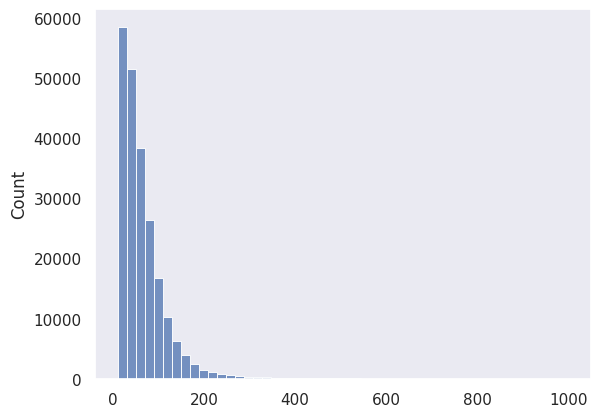

In [37]:
_ = sns.histplot([len(s) for s in all_sents], binrange=(10, 1000), bins=50)

In [38]:
# Filter sentences that are less than 10 characters and more than 512 characters
all_sents = [s for s in all_sents if 10 <= len(s) <= 512]
len(all_sents)

221068

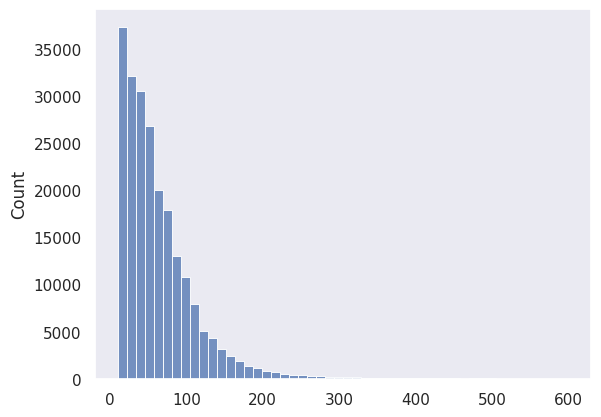

In [39]:
_ = sns.histplot([len(s) for s in all_sents], binrange=(10, 600), bins=50)

In [ ]:
with open('../data/sentences.txt', 'w') as f:
    f.write('\n'.join(all_sents) + '\n')